In [24]:
from matplotlib import pyplot as plt
import torch
from dsc.scout import SCOUT
import numpy as np

#autoreload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
config_path = './experiment_config/synthetic.yaml'
data_path = './synthetic_data/synthetic_data_noise_1/'
op_dir = './logs/'

In [27]:
#setup scout model
random_seed = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
scout = SCOUT(config_path=config_path,
            op_dir=op_dir,
            random_seed=random_seed,
            datapath=data_path,
            device=device)

In [ ]:
scout.fit(pretrain=True, pretrain_iters=1e4, finetune_iters=1e3)

Pretraining model on donor units
Iteration:0	Loss_mean:0.020258573815226555	Loss_std:0.0
Iteration:100	Loss_mean:0.03396048733498901	Loss_std:0.022183602995833725
Iteration:200	Loss_mean:0.031926388223655525	Loss_std:0.021955351762980708
Iteration:300	Loss_mean:0.029194053895771503	Loss_std:0.01959704866502621
Iteration:400	Loss_mean:0.02752011880511418	Loss_std:0.025415893621389053
Iteration:500	Loss_mean:0.022706527360714972	Loss_std:0.01878480310267003
Iteration:600	Loss_mean:0.02098701468203217	Loss_std:0.01774570688112382
Iteration:700	Loss_mean:0.028166311499662696	Loss_std:0.023987590132770853
Iteration:800	Loss_mean:0.020122795021161436	Loss_std:0.01619943740656513
Iteration:900	Loss_mean:0.021324083148501812	Loss_std:0.019950111351673926
Iteration:1000	Loss_mean:0.023450776904355736	Loss_std:0.019033931929878734
Iteration:1100	Loss_mean:0.020732255645561963	Loss_std:0.02066645486775476
Iteration:1200	Loss_mean:0.02103244457859546	Loss_std:0.018512225458580216
Iteration:1300	Lo

In [ ]:
#predict post-intervention sequence
pred = scout.predict()

Modifying K


In [31]:
#plot the predicted data
mean = np.load(data_path + 'mean1.npy')
obs = np.load(data_path + 'obs1.npy')

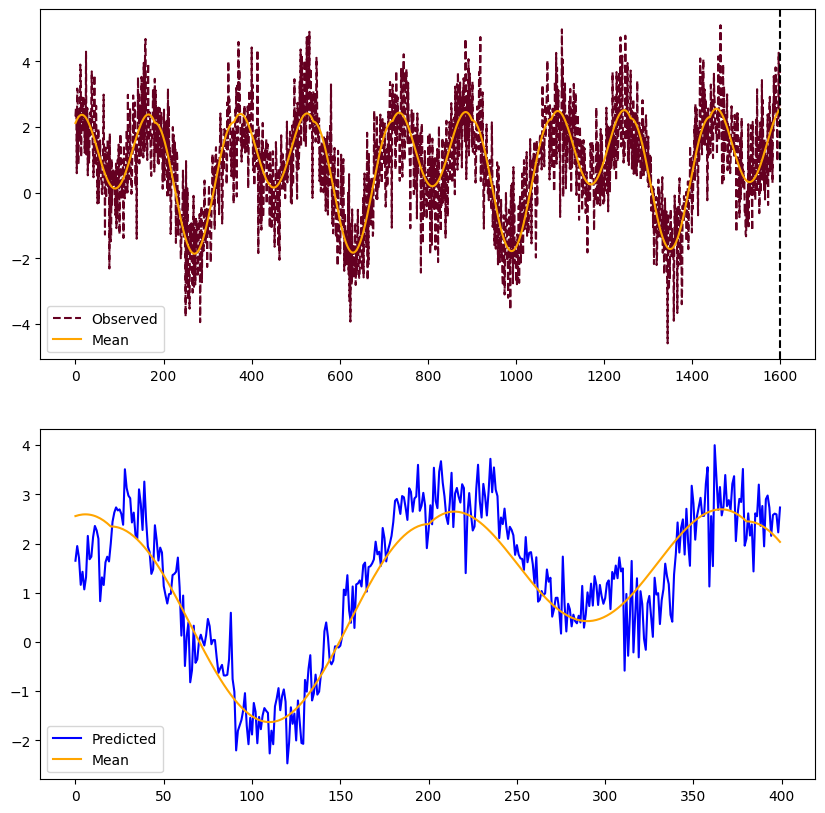

In [ ]:


fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(obs[0][:1600], label='Observed', color='xkcd:maroon', linestyle='--', alpha=1.0)
axs[0].plot(mean[0][:1600], label='Mean', color='orange')
axs[0].plot(mean[0][400:], label='Counterfactual Mean', color='blue')
axs[0].axvline(x =1600,ymin=0, ymax =1 ,linestyle='--',color='black')
axs[0].legend()
axs[1].plot(pred, label='Predicted', color='blue')
axs[1].plot(mean[0][1600:], label='Mean', color='orange')
axs[1].legend()
plt.show()